In [3]:
# Input format
# 2
# 5
# 2 1
# 1 2
# 2 2
# 6 6
# 5 7

Enter the number of clusters (k): 2
Enter the number of data points: 5
Enter the data points (x y):
2 1
1 2
2 2
6 6
5 7

--- Iteration 1 ---
Centroids:
Centroid 0: [1.6667, 1.6667]
Centroid 1: [5.5, 6.5]

Clusters:
Cluster 0: [[2.0, 1.0], [1.0, 2.0], [2.0, 2.0]]
Cluster 1: [[6.0, 6.0], [5.0, 7.0]]

--- Iteration 2 ---
Centroids:
Centroid 0: [1.6667, 1.6667]
Centroid 1: [5.5, 6.5]

Clusters:
Cluster 0: [[2.0, 1.0], [1.0, 2.0], [2.0, 2.0]]
Cluster 1: [[6.0, 6.0], [5.0, 7.0]]

Converged.

=== Final Results ===
Final Centroids:
Centroid 0: [1.6667, 1.6667]
Centroid 1: [5.5, 6.5]

Data Points in Each Cluster:
Cluster 0: [[2.0, 1.0], [1.0, 2.0], [2.0, 2.0]]
Cluster 1: [[6.0, 6.0], [5.0, 7.0]]


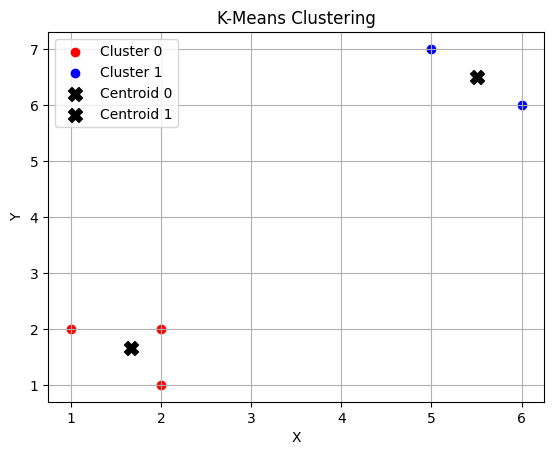

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Get user input
def get_user_input():
    try:
        k = int(input("Enter the number of clusters (k): "))
        n = int(input("Enter the number of data points: "))
        print("Enter the data points (x y):")
        data = []
        for _ in range(n):
            user_input = input()
            parts = user_input.split()
            x = float(parts[0])
            y = float(parts[1])
            data.append([x, y])
        return k, np.array(data)
    except Exception as e:
        print("Error:", e)
        return None, None

# Calculate Euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Assign points to closest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        index = np.argmin(distances)
        clusters[index].append(point)
    return clusters

# Compute new centroids
def compute_centroids(clusters, old_centroids, data):
    new_centroids = []
    for i, cluster in enumerate(clusters):
        if cluster:
            new_centroids.append(np.mean(cluster, axis=0))
        else:
            new_centroids.append(random.choice(data))  # Handle empty cluster
    return new_centroids

# Plot clusters
def plot_clusters(clusters, centroids):
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f'Cluster {i}')
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=100, label=f'Centroid {i}')
    plt.title("K-Means Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()


k, data = get_user_input()

if k is not None and data is not None:
    random.seed(42)
    centroids = random.sample(list(data), k)

    for iteration in range(100):
        clusters = assign_clusters(data, centroids)
        new_centroids = compute_centroids(clusters, centroids, data)

        print(f"\n--- Iteration {iteration + 1} ---")
        print("Centroids:")
        for i, centroid in enumerate(new_centroids):
            print(f"Centroid {i}: {[round(coord.tolist(), 4) for coord in centroid]}")

        print("\nClusters:")
        for i, cluster in enumerate(clusters):
            readable_points = [point.tolist() for point in cluster]
            print(f"Cluster {i}: {readable_points}")

        if np.allclose(centroids, new_centroids):
            print("\nConverged Clusters.")
            break

        centroids = new_centroids

    # Final Results
    print("\n=== Final Results ===")
    print("Final Centroids:")
    for i, centroid in enumerate(centroids):
        print(f"Centroid {i}: {[round(coord.tolist(), 4) for coord in centroid]}")

    print("\nData Points in Each Cluster:")
    for i, cluster in enumerate(clusters):
        readable_points = [point.tolist() for point in cluster]
        print(f"Cluster {i}: {readable_points}")

    # Plot final result
    plot_clusters(clusters, centroids)
